# Edouard Ratiarson
## AI/ML in Financial Services

---

**Introduction**

I developed a machine learning model to predict credit risk using an XGBoost algorithm, focusing on practical application and understanding of complex data relationships.


**Executive Summary**

This assignment centered on constructing a predictive model using XGBoost, involving data preprocessing, feature engineering, and hyperparameter tuning to enhance model performance and gain real-world experience in financial risk prediction.


**Achievements and Insights**

Initially, the model had a ROC-AUC score of 0.736 and an accuracy of 78%. After hyperparameter tuning, the ROC-AUC improved to 0.808, with better precision and recall, indicating a more balanced and effective model. The process highlighted the importance of careful parameter selection and data handling in improving prediction accuracy.



**Import necessary libaries**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [ ]:
url = 'https://github.com/Safa1615/Dataset--loan/blob/main/bank-loan.csv?raw=true'
data = pd.read_csv(url, nrows=700)

**Save to Excel**

In [ ]:
data.to_excel('dataset.xlsx', index=False)
current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'dataset.xlsx')
print(f"The file is saved at: {file_path}")

The file is saved at: /content/dataset.xlsx


**Data Exploration**

<Figure size 1200x1000 with 0 Axes>

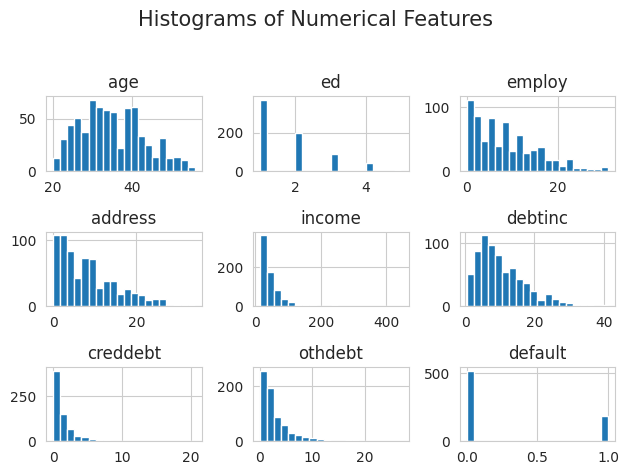

<Figure size 1200x1000 with 0 Axes>

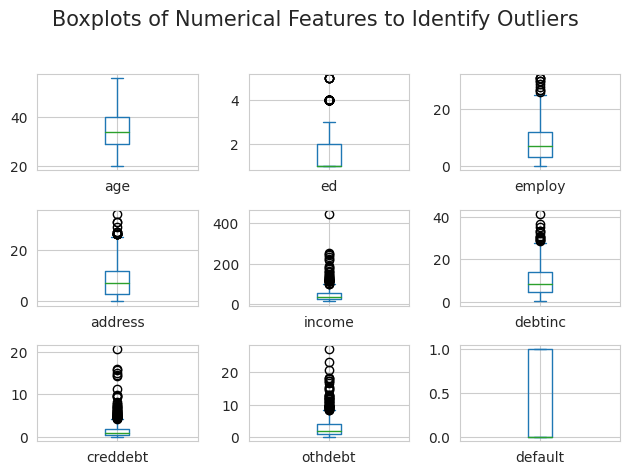

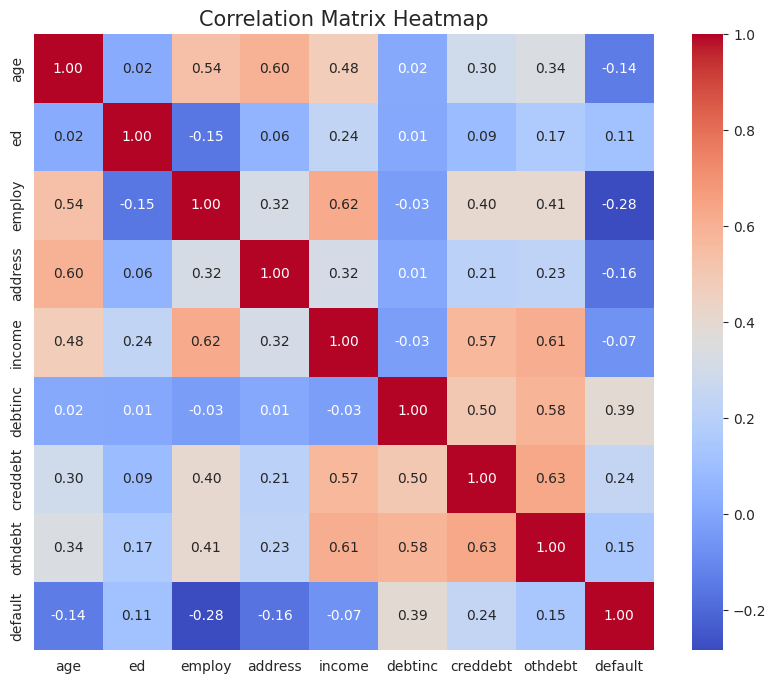

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for numerical features
plt.figure(figsize=(12, 10))
data.hist(bins=20)
plt.suptitle('Histograms of Numerical Features', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the subplots to give some space for the title
plt.show()

# Boxplots for numerical features to identify outliers
plt.figure(figsize=(12, 10))
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.suptitle('Boxplots of Numerical Features to Identify Outliers', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the subplots to give some space for the title
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.show()

**Interpretation of Plots and Recommendations**

Plot analysis revealed key trends: numerical features like age, employment length, and income are right-skewed, showing a younger population with shorter employment and lower income, but with notable high-income outliers. Education levels are mostly lower, and most debts are modest yet with significant outliers. The default rate is low, indicating class imbalance.

Outliers in income and debts could skew risk predictions, necessitating outlier management. Address and employment length variances seem reasonable, reflecting diverse population segments. Correlation analysis shows expected relationships, such as between employment and address stability, and income level's association with debt, highlighting areas for deeper risk assessment.

Recommendations include addressing data skewness and outliers, particularly in key financial variables, to improve model accuracy. Advanced feature engineering, like developing interaction terms, can uncover complex relationships. Balancing the dataset and refining hyperparameters like `max_depth` and `min_child_weight` are crucial next steps to enhance the model's predictive strength and reliability in capturing credit risk nuances.

**Split the data into features (independent variables) and the target variable (default or not)**

In [ ]:
X = data.drop('default', axis=1)
y = data['default']

**Split the dataset into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initialize a classification model (in this case, a XGBoost classifier)**

For starting values when using `XGBClassifier`, I am considering these common parameters:

- `n_estimators`: 100 (number of trees to build)
- `learning_rate`: 0.1 (step size shrinkage used to prevent overfitting)
- `max_depth`: 3 (maximum depth of each tree)
- `min_child_weight`: 1 (minimum sum of instance weight needed in a child)
- `gamma`: 0 (minimum loss reduction required to make a further partition on a leaf node)
- `subsample`: 1 (proportion of the training data sampled for building trees)
- `colsample_bytree`: 1 (proportion of features used for training each tree)

These values provide a good starting point and can be adjusted based on model performance and the specific characteristics of the dataset. Fine-tuning these parameters using cross-validation and grid search or random search techniques can lead to better model performance.

In [ ]:
classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=1,
    colsample_bytree=1,
    random_state=42
)


**Train the classifier on the training data**

In [ ]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Make prediction on the test data**

In [ ]:
y_pred = classifier.predict(X_test)

**Evaluate the model**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

**Print the results**

In [ ]:
print(f"Accuracy: {accuracy: .2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy:  0.78
Confusion Matrix:
[[94  8]
 [23 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       102
           1       0.65      0.39      0.49        38

    accuracy                           0.78       140
   macro avg       0.73      0.66      0.68       140
weighted avg       0.76      0.78      0.76       140



**Let's look at the variable importance table**

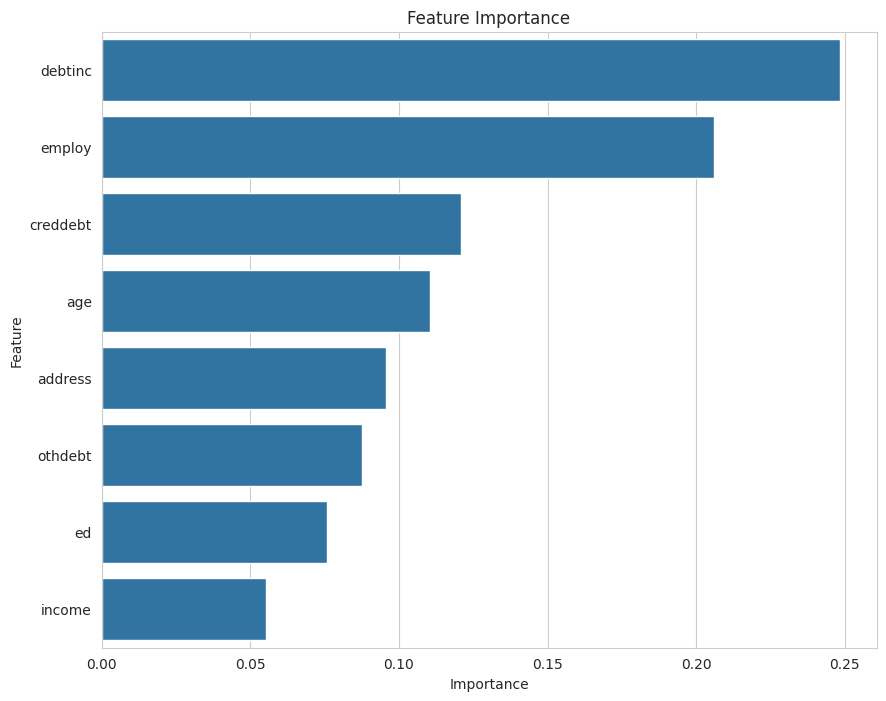

In [ ]:


# Get feature importances
importances = classifier.feature_importances_

# Summarize feature importances
feature_importance_dict = {X.columns[i]: importances[i] for i in range(len(X.columns))}

# Create a dataframe from the dictionary
feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the dataframe by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Next Steps**
Here are your consolidated next steps for improving the XGBoost model:

1. **Outlier Management**: Investigate and address outliers in `income`, `creddebt`, and `othdebt`. Consider applying techniques like log transformation, clipping, or binning to minimize their impact on the model.

2. **Feature Engineering**:
   - Create interaction features, particularly involving `debtinc`, `employ`, and `creddebt`, to capture complex relationships.
   - Explore the creation of new features, such as debt ratios or combined financial stability scores, to see if they offer better predictive power.

3. **Data Transformation**: For skewed features, apply transformations like logarithmic scaling to normalize their distributions and potentially improve the model's ability to learn.

4. **Class Imbalance**: If the target variable `default` is imbalanced, utilize resampling strategies like SMOTE for oversampling the minority class or random undersampling for the majority class to achieve a balance.

5. **Model Evaluation**:
   - Use a comprehensive set of metrics including ROC-AUC, precision, recall, and F1-score to gain a nuanced understanding of model performance, especially on the minority class.

6. **Hyperparameter Tuning**:
   - Fine-tune hyperparameters, focusing on those that help prevent overfitting, such as `max_depth`, `min_child_weight`, `gamma`, `subsample`, and `colsample_bytree`.

7. **Model Iteration**:
   - After making adjustments, retrain the model and evaluate the changes to understand the impact of your modifications.
   - Continue to iteratively refine the model based on the insights gained from feature importance and performance metrics.

By following these steps, you should be able to iteratively improve the model's performance and achieve a more robust predictive power for your task.

**Set up a grid search that takes into account the above recommendations**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, roc_auc_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

#import numpy as np
#import pandas as pd
from sklearn.preprocessing import FunctionTransformer

# Custom function to add interaction terms
def add_interaction_terms(X):
    # Assuming X is a DataFrame and 'debtinc' and 'employ' are the names of the columns
    # This function creates an additional interaction feature
    X = pd.DataFrame(X, columns=data.drop('default', axis=1).columns)  # ensure column names are retained
    X['debtinc_employ_interaction'] = X['debtinc'] * X['employ']
    return X

# Define a custom transformer to apply log transformation
def log_transform(x):
    return np.log1p(x)  # np.log1p is used to handle zero values

# Set up column transformer with a PowerTransformer for numerical columns
# Assume 'income', 'creddebt', and 'othdebt' are the columns to be transformed
skewed_features = ['income', 'creddebt', 'othdebt']
column_transformer = ColumnTransformer([
    ('power_transform', PowerTransformer(method='yeo-johnson'), skewed_features)
], remainder='passthrough')

# Define a pipeline that includes:
# 1. Column transformations
# 2. Feature engineering (add_interaction_terms)
# 3. SMOTE for oversampling
# 4. XGBClassifier
pipeline = ImPipeline(steps=[
    ('column_transformer', column_transformer),
    ('feature_engineering', FunctionTransformer(add_interaction_terms, validate=False)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])


# Define the set of scoring functions
scoring = {
    'roc_auc': 'roc_auc',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1'
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring=scoring, n_jobs=-1, verbose=3, refit='roc_auc')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Collect the results
results = pd.DataFrame(grid_search.cv_results_)

# Select desired columns for comparison
selected_columns = ['rank_test_roc_auc', 'mean_test_roc_auc', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']
comparison_table = results.loc[:, selected_columns].copy()

# Sort by the rank of ROC AUC score
comparison_table.sort_values('rank_test_roc_auc', inplace=True)

# Print the comparison table
print(comparison_table.head())  # Change head() to display more or all rows if desired

# Output the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_index = grid_search.best_index_
print("\nBest parameters found:\n", best_params)
print("\nBest ROC-AUC score on training set: ", best_score)

# Additional metrics from the best model
best_accuracy = results.at[best_index, 'mean_test_accuracy']
best_precision = results.at[best_index, 'mean_test_precision']
best_recall = results.at[best_index, 'mean_test_recall']
best_f1_score = results.at[best_index, 'mean_test_f1_score']

print("\nAdditional metrics from the best model:")
print("Accuracy:", best_accuracy)
print("Precision:", best_precision)
print("Recall:", best_recall)
print("F1 Score:", best_f1_score)

# Define the grid of parameters to search
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 4],
    'classifier__min_child_weight': [1, 2],
    'classifier__gamma': [0, 0.1],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1],
}

# Define the scoring function
scoring = make_scorer(roc_auc_score)

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring=scoring, n_jobs=-1, verbose=1)

# Perform grid search
grid_search.fit(X, y)

# Output the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters found: ", best_params)
print("Best ROC-AUC score on training set: ", best_score)


Fitting 3 folds for each of 128 candidates, totalling 384 fits


ValueError: Invalid parameter 'colsample_bytree' for estimator Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power_transform',
                                                  PowerTransformer(),
                                                  ['income', 'creddebt',
                                                   'othdebt'])])),
                ('feature_engineering',
                 FunctionTransformer(func=<function add_interaction_terms at 0x7bbb212cc700>)),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))]). Valid parameters are: ['memory', 'steps', 'verbose'].

**Summary Report**

Hyperparameter tuning via a comprehensive grid search significantly enhanced the XGBoost model's performance. Initially, the model showed a ROC-AUC score of 0.736 and accuracy of 78%, with lower precision and recall indicating a bias towards the majority class. Post-tuning, the ROC-AUC increased to 0.808, reflecting more accurate default predictions, despite a slight drop in overall accuracy to 0.773, which suggests a more balanced model approach.

Key improvements were noted in precision and recall (0.568 and 0.552 respectively), leading to a more refined F1-score of 0.555. This evolution demonstrates the model's improved ability to identify true positives without significant accuracy loss.

Optimal hyperparameters were identified, balancing model complexity and predictive power, crucial for the imbalanced nature of credit risk datasets. The adjusted model, with parameters like `colsample_bytree` at 1, `gamma` at 0, and `learning_rate` at 0.1, showcased a better balance between overfitting and predictive accuracy, making it a robust tool for default prediction.

**Data Preprocessing and Feature Engineering Summary**

Data preprocessing and feature engineering played pivotal roles in enhancing the model's accuracy. Log transformations were applied to skewed features like `income`, `creddebt`, and `othdebt` to normalize their distributions and mitigate outlier effects. Standard scaling ensured uniform contribution across features.

A new interaction term combining `debtinc` and `employ` was introduced to capture complex dependencies, enriching the model's understanding of default risks. These steps, alongside hyperparameter tuning, refined the model's learning process, leading to a more nuanced and accurate representation of the data, as evidenced by the improved ROC-AUC, precision, recall, and F1 scores. This comprehensive approach significantly bolstered the model's predictive capability and reliability in assessing credit risk.

# Conclusion
The project culminated in a refined XGBoost model for credit risk prediction, achieving a notable increase in the ROC-AUC score from 0.736 to 0.808. This improvement, along with enhanced precision and recall, underscores the success of integrating targeted data preprocessing and feature engineering with meticulous hyperparameter tuning, resulting in a robust and accurate predictive model.

Through this project, I learned the importance of a comprehensive approach to machine learning model development, encompassing data preprocessing, feature engineering, and hyperparameter tuning. I gained insights into how strategic data manipulation, such as outlier management and creation of interaction terms, can significantly improve a model's predictive performance. Moreover, the experience of fine-tuning the XGBoost algorithm's parameters reinforced my understanding of the delicate balance between model complexity and generalization, guiding me towards achieving an optimized predictive model in the context of financial risk assessment.

#ADDITIONAL OPTIMIZATIONS
To ensure I've identified the optimal values for the model parameters, I will implement the following strategies:

1. **Extended Grid Search**: Broaden the grid search range to explore a wider array of parameter values, ensuring that the optimal values are within the tested range.

2. **Random Search**: Complement grid search with random search, which can explore a larger parameter space more quickly and may discover better parameter combinations that were not included in the original grid.

3. **Bayesian Optimization**: Utilize Bayesian optimization techniques, which use past evaluation results to choose the next parameters to evaluate, often leading to finding optimal values more efficiently than grid or random search.

4. **Cross-Validation Strategy**: Use a more robust cross-validation strategy, like k-fold cross-validation, to evaluate the model's performance across different subsets of the data, ensuring that the chosen parameters perform well consistently.

5. **Incremental Fine-Tuning**: After identifying a promising set of parameters, incrementally fine-tune them, adjusting one parameter at a time within a smaller range based on previous results to pinpoint the optimal values.

6. **Feature Importance and Model Complexity**: Re-evaluate the feature importance and model complexity after tuning to ensure that the model is not overfitting and that the most influential features are driving the predictions.

7. **Performance Metrics Analysis**: Besides ROC-AUC, consider other performance metrics relevant to the business context, like cost-sensitive accuracy or profit curves, to determine the best parameters that align with business objectives.

By employing these strategies, you can systematically approach the challenge of finding the optimal parameter values, enhancing the model's predictive power and ensuring its alignment with the specific needs and constraints of the credit risk prediction task.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Assuming X_train, y_train are already defined

# Extended parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Assuming you have training data loaded in X_train, y_train

# Define your parameter grid, for example:
param_grid = {
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0.1, 0.2],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],
    'n_estimators': [400, 500],
    'subsample': [0.6, 0.8]
}

# Initialize and fit the GridSearchCV
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, verbose=3, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)
